# **Laboratorio 6: Implementación algoritmo de descenso de gradiente**
**Facultad de ingeniería, departamento de Ingeniería Biomédica, Universidad de los Andes**\
**IBIO-2440 Programación científica**

**Nombres de los integrantes**


1.   Santiago Vela
2.   Eliana Saavedra

**Número del grupo**

*E7*

El descenso de gradiente es un algoritmo iterativo de optimización que se utiliza para encontrar un mínimo/máximo local de una función determinada. Este método es usado comunmente en *machine learning* para minimizar una función de costo (por ejemplo, al encontrar los coeficientes que mejor se ajustan a una regresión lineal).


---


## **Gradiente:**

En los laboratorios pasados vimos que para obtener el gradiente de una función $f:\mathbb{R^n}→\mathbb{R}$, se debe calcular la derivada parcial con respecto a cada variable por lo que el gradiente queda de la forma:

\begin{align*}
  ∇f(x)= \left [\frac{∂f}{∂x_1} , \frac{∂f}{∂x_2}, ..., \frac{∂f}{∂x_n}\right]^T
\end{align*}

Donde $x$ es el vector de variables independientes $x^*=[x_1^*,x_2^*, ..., x_n^*]^T$,

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/3d-gradient-cos.svg/1280px-3d-gradient-cos.svg.png" width="500"/>
</div>
Figura 1. Dada una función $f(x)$, el gradiente de esta función se puede entender como un campo de vectores que apuntan hacia el lugar donde la función crece, cuyas magnitudes vectotriales indican la tasa con la cual crece.


## **Descenso de gradiente:**

Ahora que sabemos que el gradiente permite inferir la dirección hacia donde la función crece, podemos utilizarla para encontrar el minimizador de una función para esto cambiamo la dirección de los vectores multiplicando por -1 la función gradiente. De aquí, solo nos queda decir cuánto avanzamos en cada paso. Por lo que al final podemos establecer que:

\begin{align*}
  x(k+1) = x(k)- α ∇f(x(k)) 
\end{align*}

Donde el parámetro α corresponde al tamaño del paso.

Entonces el pseudoalgoritmo del descenso de gradiente quedaría así:


> 0. Defina un valor de $α$, un valor para $x(0)$, un parámetro de convergencia $ϵ$ y un número máximo de pasos $N_{max}$. \
> 1. Inicialice las variables $x = x(k)$, $k = 0$.
> 2.Procedimiento iterativo hasta condición de parada:\
>  2.1. Calcule $∇f(x(k))$ \
>  2.2. Actualice $x(k+1) = x(k)- α ∇f(x(k))$ \
>  2.4. Si $k+1 \geq N_{max}$, parar, de lo contrario, seguir al paso 2.5.\
>  2.5. Si $||x(k+1)-x(k)||_2>ϵ$, hacer $k = k+1$ y volver al paso 2.1, de lo contrario, parar.
> 3. Retorne $x(k)$




1. Tenga en cuenta la siguiente forma cuadrática:

\begin{align*}
  f(\mathbf{x}) = \mathbf{x}^TQ\mathbf{x}+B^T\mathbf{x}+C
  \end{align*}
  
donde 

\begin{align}
Q = \begin{pmatrix}
1 & 3 \\
-2 & 1
\end{pmatrix}
\end{align}

\begin{align}
B = \begin{pmatrix}
1/2 \\
1
\end{pmatrix}
\end{align}

\begin{align}
C= 5
\end{align}

Con 

\begin{align}
x= [x_1, x_2]^T
\end{align}



Diseñe una función que reciba como parámetros un punto inicial $x(0) = [x_1(0), x_2(0)]^T$, un parámetro de convergencia $ϵ$, un tamaño de paso $\alpha$ y un número máximo de iteraciones $N_{max}$. Esta función debe implementar el descenso de gradiente para la forma cuadrática anterior y retornar una matriz cuya primera columna sea los valores en todas las iteraciones de $x_1$, la segunda columna los valores de todas las iteraciones de $x_2$, y la tercera columna, los valores de la función evaluada en los puntos en cada iteración. En caso de que se alcance el número de iteraciones máximo, debe imprimir que el algoritmo no convergió. 

In [123]:

import numpy as np

def gradiente_descendiente(Q, B, C, x0, alpha, eps, Nmax):
    x = x0
    k = 0
    
    funcion = x.T @ Q @ x + B.T @ x + C
    results = np.array([x[0][0], x[1][0], funcion[0][0]])
    
    while k < Nmax:
        Qs = (Q + Q.T) / 2 
        grad_funcion = 2 * Qs @ x + B
        x_new = x - alpha * grad_funcion
        funcion_nueva = x_new.T @ Qs @ x_new + B.T @ x_new + C
        
        if np.linalg.norm(x_new - x) < eps:
            results = np.vstack((results, [x_new[0][0], x_new[1][0], funcion_nueva[0][0]]))
            break
        
        results = np.vstack((results, [x_new[0][0], x_new[1][0], funcion_nueva[0][0]]))
        x = x_new
        funcion = funcion_nueva
        k += 1
    
    if k == Nmax:
        print("El algoritmo no convergió después de", Nmax, "iteraciones.")
    
    return results





2. Ahora, se desea probar tres valores para el tamaño de paso:

*   $α = 0.1$
*   $α = 0.5$
*   $α = 0.8$

Con los siguientes valores:

*   $ϵ = 0.1$
*   $N_{max}=100$
*   $x(0) = [2,2]^T$

Implemente su función anterior con los parámetros indicados.


In [124]:
Q = np.array([[1, 3], [-2, 1]])
B = np.array([[0.5], [1]])
C = 5
x0 = np.array([[2], [2]])

alpha = 0.1
eps = 0.1
Nmax = 100
results = gradiente_descendiente(Q, B, C, x0, alpha, eps, Nmax)

print(results)

[[ 2.          2.         20.        ]
 [ 1.35        1.3        12.2425    ]
 [ 0.9         0.805       8.437525  ]
 [ 0.5895      0.454       6.57000925]
 [ 0.3762      0.20425     5.65243335]
 [ 0.230535    0.02578     5.20080169]
 [ 0.13185    -0.1024295   4.9778664 ]
 [ 0.06572295 -0.1951286   4.86730312]
 [ 0.02209122 -0.26267518  4.81205389]]


In [125]:
Q = np.array([[1, 3], [-2, 1]])
B = np.array([[0.5], [1]])
C = 5
x0 = np.array([[2], [2]])

alpha = 0.5
eps = 0.1
Nmax = 100
results = gradiente_descendiente(Q, B, C, x0, alpha, eps, Nmax)

print(results)

[[ 2.00000000e+00  2.00000000e+00  2.00000000e+01]
 [-1.25000000e+00 -1.50000000e+00  8.56250000e+00]
 [ 5.00000000e-01  1.25000000e-01  5.70312500e+00]
 [-3.12500000e-01 -7.50000000e-01  4.98828125e+00]
 [ 1.25000000e-01 -3.43750000e-01  4.80957031e+00]
 [-7.81250000e-02 -5.62500000e-01  4.76489258e+00]
 [ 3.12500000e-02 -4.60937500e-01  4.75372314e+00]
 [-1.95312500e-02 -5.15625000e-01  4.75093079e+00]]


In [126]:
Q = np.array([[1, 3], [-2, 1]])
B = np.array([[0.5], [1]])
C = 5
x0 = np.array([[2], [2]])

alpha = 0.8
eps = 0.1
Nmax = 100
results = gradiente_descendiente(Q, B, C, x0, alpha, eps, Nmax)

print(results)

El algoritmo no convergió después de 100 iteraciones.
[[ 2.00000000e+00  2.00000000e+00  2.00000000e+01]
 [-3.20000000e+00 -3.60000000e+00  3.45200000e+01]
 [ 4.40000000e+00  3.92000000e+00  6.30944000e+01]
 [-6.17600000e+00 -6.67200000e+00  1.19104832e+02]
 [ 8.64320000e+00  8.14400000e+00  2.28885463e+02]
 [-1.21011200e+01 -1.26009600e+01  4.44055507e+02]
 [ 1.69414400e+01  1.64414720e+01  8.65788794e+02]
 [-2.37180416e+01 -2.42180352e+01  1.69238604e+03]
 [ 3.32052531e+01  3.27052544e+01  3.31251663e+03]
 [-4.64873554e+01 -4.69873551e+01  6.48797260e+03]
 [ 6.50822973e+01  6.45822974e+01  1.27118663e+04]
 [-9.11152163e+01 -9.16152163e+01  2.49106979e+04]
 [ 1.27561303e+02  1.27061303e+02  4.88204080e+04]
 [-1.78585824e+02 -1.79085824e+02  9.56834396e+04]
 [ 2.50020154e+02  2.49520154e+02  1.87534982e+05]
 [-3.50028215e+02 -3.50528215e+02  3.67564004e+05]
 [ 4.90039501e+02  4.89539501e+02  7.20420888e+05]
 [-6.86055301e+02 -6.86555301e+02  1.41202038e+06]
 [ 9.60477422e+02  9.5997742

3. Reescriba la función del primer punto pero esta vez, el criterio de parada debe ser basado en cómo cambia el gradiente de la función: $||∇f(x(k))||_2≤\epsilon$.


In [127]:
import numpy as np 

def gradiente_con_otra_parada(Q, B, C, x0, alpha, eps, Nmax):
    x = x0
    k = 0
    fxk = x.T @ Q @ x + B.T @ x + C
    results = np.array([[x[0, 0], x[1, 0], fxk[0, 0]]])
    
    while k < Nmax:
        Qs=(Q+Q.T)/2 
        
        grad_fxk =  2*Qs@x +B
        x_new = x - alpha * grad_fxk
        fxk_new = x_new.T @ Qs @ x_new + B.T @ x_new + C
        norm_grad_fxk = np.linalg.norm(grad_fxk)
        
        if  norm_grad_fxk <= eps:  # $||∇f(x(k))||_2≤\epsilon$.

            results = np.vstack((results, [[x_new[0, 0], x_new[1, 0], fxk_new[0, 0]]]))
            break
        
        results = np.vstack((results, [[x_new[0, 0], x_new[1, 0], fxk_new[0, 0]]]))
        x = x_new
        fxk = fxk_new
        k += 1
    
    if k == Nmax:
        print("El algoritmo no convergió después de", Nmax, "iteraciones.")
    
    return results


4. Corra el algoritmo modificado con un tamaño de paso que haga el algoritmo eficiente, es decir, escoja entre los valores anteriores el tamaño de paso más grande entre tal que el algoritmo converja. Sin embargo, en esta vez, se desea probar tres valores para el parámetro de convergencia $ϵ$:



*   $ϵ=0.1$
*   $ϵ=0.5$
*   $ϵ=1$



In [128]:
Q = np.array([[1, 3], [-2, 1]])
B = np.array([[0.5], [1]])
C = 5
x0 = np.array([[2], [2]])

alpha = 0.5
eps = 0.1
Nmax = 100
results = gradiente_con_otra_parada(Q, B, C, x0, alpha, eps, Nmax)

print(results)



[[ 2.00000000e+00  2.00000000e+00  2.00000000e+01]
 [-1.25000000e+00 -1.50000000e+00  8.56250000e+00]
 [ 5.00000000e-01  1.25000000e-01  5.70312500e+00]
 [-3.12500000e-01 -7.50000000e-01  4.98828125e+00]
 [ 1.25000000e-01 -3.43750000e-01  4.80957031e+00]
 [-7.81250000e-02 -5.62500000e-01  4.76489258e+00]
 [ 3.12500000e-02 -4.60937500e-01  4.75372314e+00]
 [-1.95312500e-02 -5.15625000e-01  4.75093079e+00]
 [ 7.81250000e-03 -4.90234375e-01  4.75023270e+00]]


In [129]:
Q = np.array([[1, 3], [-2, 1]])
B = np.array([[0.5], [1]])
C = 5
x0 = np.array([[2], [2]])

alpha = 0.5
eps = 0.5
Nmax = 100
results = gradiente_con_otra_parada(Q, B, C, x0, alpha, eps, Nmax)

print(results)

[[ 2.          2.         20.        ]
 [-1.25       -1.5         8.5625    ]
 [ 0.5         0.125       5.703125  ]
 [-0.3125     -0.75        4.98828125]
 [ 0.125      -0.34375     4.80957031]
 [-0.078125   -0.5625      4.76489258]
 [ 0.03125    -0.4609375   4.75372314]]


In [130]:
Q = np.array([[1, 3], [-2, 1]])
B = np.array([[0.5], [1]])
C = 5
x0 = np.array([[2], [2]])

alpha = 0.5
eps = 1
Nmax = 100
results = gradiente_con_otra_parada(Q, B, C, x0, alpha, eps, Nmax)

print(results)

[[ 2.          2.         20.        ]
 [-1.25       -1.5         8.5625    ]
 [ 0.5         0.125       5.703125  ]
 [-0.3125     -0.75        4.98828125]
 [ 0.125      -0.34375     4.80957031]
 [-0.078125   -0.5625      4.76489258]]


5. Realice dos gráficas: una debe incluir las curvas de nivel para los valores de $f$ en cada iteración, donde se muestre la trayectoria del descenso de gradiente con convergencia basada en $||x(k+1)-x(k)||_2>ϵ$. La otra debe tener las curvas de nivel para los valores de $f$ en cada iteración, donde se muestre la trayectoria del descenso de gradiente basado en la convergencia $||∇f(x(k))||_2≤\epsilon$. **(Use la matriz que genera su función)**. Se debe ver algo así:

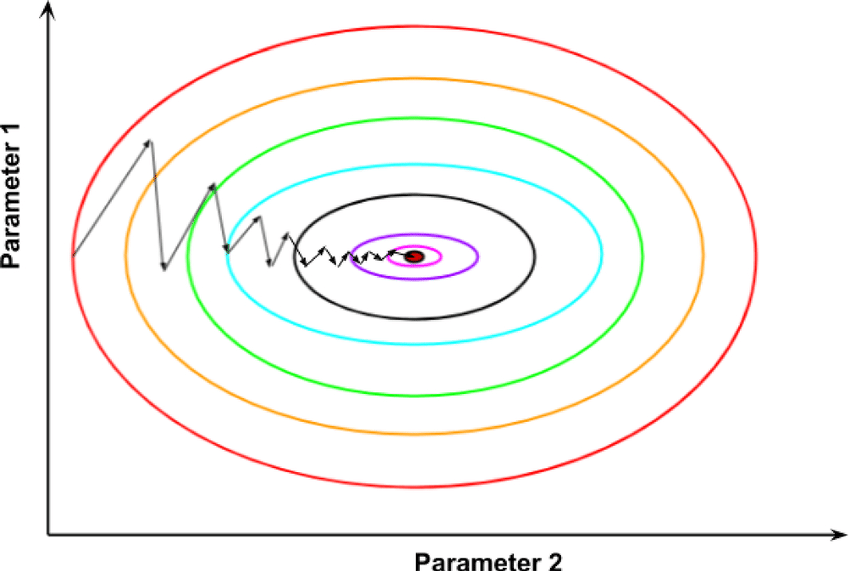

6. Responder las siguientes pregutnas:

- ¿Cuál tamaño de paso fue más eficiente?, explique.
En general, el descenso de gradiente se evalúa en función de la velocidad de convergencia y la precisión alcanzada. En este caso, los alpha de 0.8 no convirgio. Entonces ese tamañó de paso no sirve. Los pasos de 0.1 y 0.5 si convirgieron, no obstnate los resultados son bastante cercanos, por lo que se puede decir que es mas eficiente el de 0.5 ya que con los pasos de 0.1 se hacen mas iteraciones para llegar al resultado optimo. En cambio con 0.5 se hacen menos iteraciones, es decir, los pasos son mas grandes y llega más rapido al resultado sin saltarse el punto que estamos buscando. 

- ¿Por qué cree que un tamaño de paso muy grande no permite alcanzar la convergencia?
Si el tamaño de paso en el algoritmo de descenso de gradiente es demasiado grande, es posible que el algoritmo no converja hacia el mínimo global y en su lugar oscile o diverja. Esto se debe a que el algoritmo podría saltarse el mínimo y continuar en la dirección opuesta, lo que puede ser especialmente problemático si el tamaño de paso es mayor que la tasa de aprendizaje óptima.
La tasa de aprendizaje óptima es el tamaño de paso ideal que asegura que el algoritmo converja hacia el mínimo global en la menor cantidad de iteraciones. Si el tamaño de paso es mayor que este valor, la actualización de los parámetros puede volverse inestable y el algoritmo podría oscilar o diverger.
Por lo tanto, es importante elegir un tamaño de paso adecuado que permita al algoritmo converger sin oscilaciones o divergencias. Para lograr esto, se puede probar con diferentes tamaños de paso y elegir el que resulte en la menor función objetivo después de un número fijo de iteraciones o de acuerdo a algún otro criterio de parada.

- ¿Cómo influye el parámetro de convergencia $ϵ$ en la eficiencia del algoritmo?
El parámetro de convergencia, $\epsilon$, es importante en el algoritmo de descenso de gradiente porque determina cuándo se considera que el algoritmo ha alcanzado una solución aceptable. Si $\epsilon$ es demasiado pequeño, el algoritmo puede tardar más tiempo en converger a una solución, ya que debe realizar más iteraciones antes de alcanzar la precisión deseada. Por otro lado, si $\epsilon$ es demasiado grande, la solución obtenida puede no ser lo suficientemente precisa para cumplir con los requisitos del problema.
Por lo tanto, es importante elegir un valor adecuado para $\epsilon$ que permita al algoritmo converger en un número razonable de iteraciones, sin sacrificar la precisión de la solución. Además, el valor de $\epsilon$ debe ser coherente con el tamaño del problema que se está resolviendo. En general, el valor de $\epsilon$ se elige en función de la precisión requerida por el problema y se ajusta durante la ejecución del algoritmo según la velocidad de convergencia observada.

- ¿Qué pasaría si se usa el descenso de gradiente con una forma cuadrática no convexa?
En el caso de una forma cuadrática no convexa, el descenso de gradiente podría conducir a la búsqueda de un mínimo local que no sea el mínimo global, o incluso podría quedar atrapado en un punto de silla donde no hay dirección clara hacia un mínimo. Esto se debe a que en una forma cuadrática no convexa, la función objetivo puede tener múltiples mínimos locales, lo que significa que el algoritmo podría converger a un mínimo local en lugar del mínimo global deseado. Además, en un punto de silla, la función tiene gradientes nulos en todas las direcciones, lo que dificulta la elección de una dirección para el descenso de gradiente. En tales casos, se necesitan técnicas más avanzadas, como el descenso de gradiente estocástico o el método de Newton, para encontrar el mínimo global de manera eficiente.